Epoch 0: Loss = 0.5145
Epoch 10: Loss = 0.4373
Epoch 20: Loss = 0.2797
Epoch 30: Loss = 0.0340
Epoch 40: Loss = 0.0119
Epoch 50: Loss = 0.0037
Epoch 60: Loss = 0.0020
Epoch 70: Loss = 0.0011
Epoch 80: Loss = 0.0005
Epoch 90: Loss = 0.0003


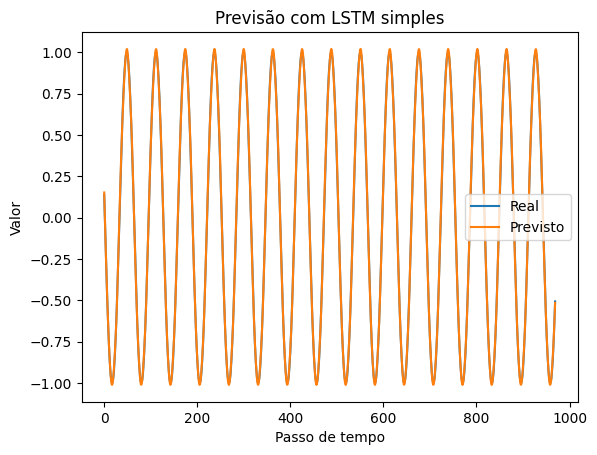

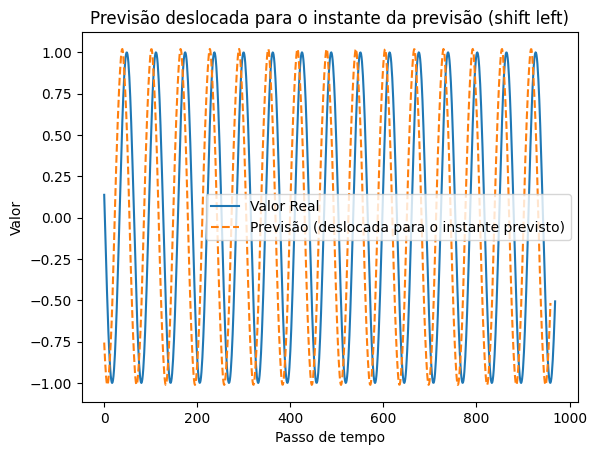

Janela de entrada (20 pontos): [0.09993302 0.19886554 0.29580708 0.3897871  0.47986471 0.56513807
 0.64475345 0.71791378 0.7838866  0.84201141 0.89170627 0.93247368
 0.96390547 0.98568695 0.99760007 0.99952556 0.99144412 0.97343668
 0.94568351 0.90846248]
Valor real (t+10): 0.03848004782872783
Valor previsto pelo modelo: 0.044394999742507935
Diferença (real - previsto): -0.005914951913780102


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 1. Gerar dados sintéticos (seno com ruído)
np.random.seed(42)
x = np.linspace(0, 100, 1000)
y = np.sin(x) + 0 * np.random.randn(1000)

# 2. Criar janelas deslizantes (sequências de entrada e o próximo valor como alvo)
def create_sequences(data, seq_len, pred_step=10):
    X, y = [], []
    for i in range(len(data) - seq_len - pred_step):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len + pred_step])
    return np.array(X), np.array(y)

# Atualiza os dados
SEQ_LEN = 20
PRED_STEP = 10
X, y_target = create_sequences(y, SEQ_LEN, PRED_STEP)
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
y_tensor = torch.tensor(y_target, dtype=torch.float32).unsqueeze(-1)


SEQ_LEN = 20
X, y_target = create_sequences(y, SEQ_LEN)

# 3. Converter para tensores do PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # [batch, seq_len, 1]
y_tensor = torch.tensor(y_target, dtype=torch.float32).unsqueeze(-1)  # [batch, 1]

# 4. Definir o modelo LSTM mais simples possível
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=16, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)  # out: [batch, seq_len, hidden]
        out = self.linear(out[:, -1])  # Pega apenas o último tempo
        return out

# 5. Instanciar modelo, função de perda e otimizador
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 6. Treinamento
EPOCHS = 100
for epoch in range(EPOCHS):
    model.train()
    output = model(X_tensor)
    loss = criterion(output, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 7. Previsão e visualização
model.eval()
with torch.no_grad():
    preds = model(X_tensor).squeeze().numpy()

plt.plot(y_target, label='Real')
plt.plot(preds, label='Previsto')
plt.legend()
plt.title("Previsão com LSTM simples")
plt.xlabel("Passo de tempo")
plt.ylabel("Valor")
plt.show()

import numpy as np
import matplotlib.pyplot as plt

PRED_STEP = 10

# preds é array das previsões
# y_target são os valores reais

# Vamos definir o eixo x real (posição dos valores reais)
x_real = np.arange(len(y_target))

# Agora vamos criar eixo x para as previsões deslocado para a esquerda
x_pred = x_real - PRED_STEP

# Como x_pred tem valores negativos no começo, vamos mascarar esses valores
mask = x_pred >= 0

plt.plot(x_real, y_target, label='Valor Real')

# Plotar previsões somente nos pontos válidos (onde x_pred >= 0)
plt.plot(x_pred[mask], preds[mask], linestyle='--', label='Previsão (deslocada para o instante previsto)')

plt.legend()
plt.title("Previsão deslocada para o instante da previsão (shift left)")
plt.xlabel("Passo de tempo")
plt.ylabel("Valor")
plt.show()

import torch

def predict_10_steps_ahead(window, seq_len=20):
    """
    Recebe:
        model: modelo LSTM treinado
        window: array/lista com os últimos seq_len valores da série (entrada)
        seq_len: tamanho da janela (default 20)

    Retorna:
        valor previsto para o ponto t + 10
    """

    # Certifica que a janela tem o tamanho correto
    if len(window) != seq_len:
        raise ValueError(f"A janela deve ter exatamente {seq_len} valores.")

    # Converte para tensor com shape [batch=1, seq_len, input_size=1]
    input_tensor = torch.tensor(window, dtype=torch.float32).unsqueeze(0).unsqueeze(2)

    model.eval()  # Modo avaliação (sem dropout, etc)
    with torch.no_grad():
        pred = model(input_tensor).item()  # Previsão do valor t+10

    return pred

series = np.sin(x) + 0.0 * np.random.randn(1000)

# Janela de entrada: últimos 20 valores da série (do índice 1 até 20)
input_window = series[1:21]
print("Janela de entrada (20 pontos):", input_window)

# Valor real que queremos prever: o valor 10 passos à frente (índice 31)
true_value = series[31]
print("Valor real (t+10):", true_value)

# Previsão do modelo para 10 passos à frente, usando a janela de entrada
predicted_value = predict_10_steps_ahead(window=input_window, seq_len=20)
print("Valor previsto pelo modelo:", predicted_value)

# Diferença entre o valor real e o previsto
error = true_value - predicted_value
print("Diferença (real - previsto):", error)



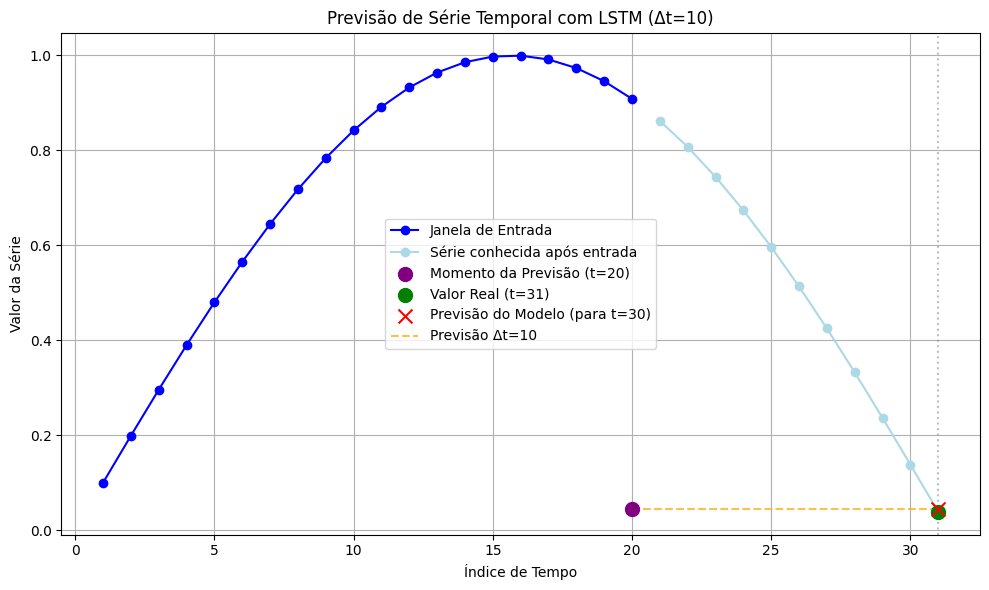

In [2]:
# Índices
start_idx = 1           # Início da janela
end_idx = 21            # Fim da janela (último ponto observado)
predict_idx = 31        # Índice do valor que será previsto (t+10)
prediction_time = 20    # Tempo em que a previsão foi feita (baseada até t=20)

# Eixo X da janela de entrada
window = np.arange(start_idx, end_idx)

# Trecho da série que já era conhecida entre o fim da janela e antes da previsão
window_known = np.arange(end_idx, predict_idx+1)
series_known = series[end_idx:predict_idx+1]

# Gráfico
plt.figure(figsize=(10, 6))

# Plot da janela de entrada (valores usados para prever)
plt.plot(window, input_window, label='Janela de Entrada', marker='o', color='blue')

# Plot da parte da série conhecida entre t=21 e t=29
plt.plot(window_known, series_known, label='Série conhecida após entrada', marker='o', color='lightblue')

# Marcar ponto em que a previsão foi feita
plt.scatter(prediction_time, predicted_value, color='purple', s=100,
            label='Momento da Previsão (t=20)', zorder=5)

# Marcar valor real do futuro (a ser comparado com previsão)
plt.scatter(predict_idx, true_value, color='green', s=100,
            label='Valor Real (t=31)', zorder=5)

# Marcar valor previsto (feito em t=20 para t=30)
plt.scatter(predict_idx, predicted_value, color='red', s=100, marker='x',
            label='Previsão do Modelo (para t=30)', zorder=5)

# Linha horizontal conectando t=20 à previsão em t=30
plt.plot([prediction_time, predict_idx], [predicted_value, predicted_value],
         linestyle='--', color='orange', alpha=0.7, label='Previsão Δt=10')

# Linha vertical pontilhada para indicar onde está o valor previsto
plt.axvline(predict_idx, linestyle=':', color='gray', alpha=0.5)

# Configurações finais do gráfico
plt.title("Previsão de Série Temporal com LSTM (Δt=10)")
plt.xlabel("Índice de Tempo")
plt.ylabel("Valor da Série")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 000 | Train Loss: 1.10195 | Val Loss: 0.78289
Epoch 001 | Train Loss: 1.09586 | Val Loss: 0.78060
Epoch 002 | Train Loss: 1.08967 | Val Loss: 0.77813
Epoch 003 | Train Loss: 1.08298 | Val Loss: 0.77546
Epoch 004 | Train Loss: 1.07592 | Val Loss: 0.77251
Epoch 005 | Train Loss: 1.06833 | Val Loss: 0.76922
Epoch 006 | Train Loss: 1.05975 | Val Loss: 0.76553
Epoch 007 | Train Loss: 1.05030 | Val Loss: 0.76137
Epoch 008 | Train Loss: 1.03968 | Val Loss: 0.75666
Epoch 009 | Train Loss: 1.02697 | Val Loss: 0.75136
Epoch 010 | Train Loss: 1.01414 | Val Loss: 0.74544
Epoch 011 | Train Loss: 0.99852 | Val Loss: 0.73894
Epoch 012 | Train Loss: 0.98042 | Val Loss: 0.73209
Epoch 013 | Train Loss: 0.96111 | Val Loss: 0.72541
Epoch 014 | Train Loss: 0.94057 | Val Loss: 0.72006
Epoch 015 | Train Loss: 0.91970 | Val Loss: 0.71826
Epoch 016 | Train Loss: 0.89944 | Val Loss: 0.72381
Epoch 017 | Train Loss: 0.88641 | Val Loss: 0.74057
Epoch 018 | Train Loss: 0.88680 | Val Loss: 0.76278
Epoch 019 | 

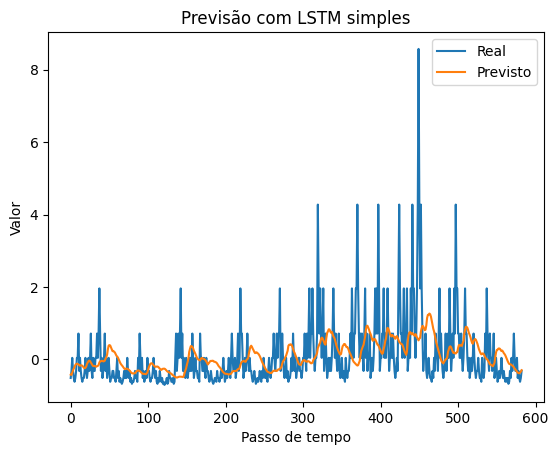

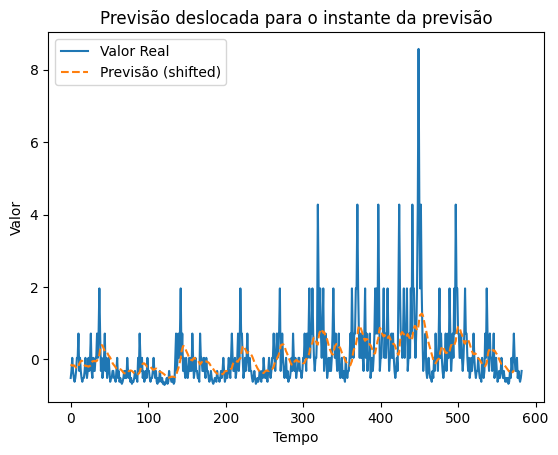

Janela de entrada (20 pontos): [-0.32096407 -0.32096407 -0.51563339  0.04056466  0.71197516 -0.32096407
  0.04056466 -0.51563339 -0.32096407 -0.32096407  0.04056466 -0.32096407
 -0.51563339 -0.51563339 -0.62045533  0.04056466 -0.32096407 -0.51563339
 -0.32096407 -0.62045533]
Valor real (t+10): -0.5156333880448576
Valor previsto pelo modelo: -0.22645564377307892
Diferença (real - previsto): -0.28917774427177867


In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. --- Gerador P-model ---
def next_step_1d(dx, p):
    y2 = np.zeros(dx.size * 2)
    sign = np.random.rand(dx.size) - 0.5
    sign /= np.abs(sign)
    y2[0::2] = dx + sign * (1 - 2 * p) * dx
    y2[1::2] = dx - sign * (1 - 2 * p) * dx
    return y2

def pmodel(noValues=4096, p=0.35, seed=42):
    np.random.seed(seed)
    noOrders = int(np.ceil(np.log2(noValues)))
    dx = np.array([1.0])
    for _ in range(noOrders):
        dx = next_step_1d(dx, p)
    return dx[:noValues]

serie = pmodel()

# 2. --- Normalização ---
scaler = StandardScaler()
serie_scaled = scaler.fit_transform(serie.reshape(-1, 1)).flatten()

# 3. Criar janelas deslizantes
def create_sequences(data, seq_len, pred_step=10):
    X, y = [], []
    for i in range(len(data) - seq_len - pred_step):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len + pred_step])
    return np.array(X), np.array(y)

SEQ_LEN = 200
PRED_STEP = 10
X, y = create_sequences(serie_scaled, SEQ_LEN, PRED_STEP)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# 4. --- Modelo LSTM ---
class LSTMForecast(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, dropout=0.2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.linear(out[:, -1])

model = LSTMForecast()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 5. --- Treinamento com early stopping ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def to_tensor(x): return torch.tensor(x, dtype=torch.float32).unsqueeze(-1).to(device)

X_train_t, y_train_t = to_tensor(X_train), to_tensor(y_train)
X_val_t, y_val_t = to_tensor(X_val), to_tensor(y_val)
X_test_t, y_test_t = to_tensor(X_test), to_tensor(y_test)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 200
best_val_loss = np.inf
patience = 20
counter = 0

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    pred = model(X_train_t)
    loss = loss_fn(pred, y_train_t)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_pred = model(X_val_t)
        val_loss = loss_fn(val_pred, y_val_t)

    print(f"Epoch {epoch:03d} | Train Loss: {loss.item():.5f} | Val Loss: {val_loss.item():.5f}")

    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("🔴 Early stopping triggered.")
            break

model.load_state_dict(best_model)

# 6. --- Previsão e visualização ---
model.eval()
with torch.no_grad():
    preds = model(X_test_t).squeeze().cpu().numpy()

plt.plot(y_test, label='Real')
plt.plot(preds, label='Previsto')
plt.legend()
plt.title("Previsão com LSTM simples")
plt.xlabel("Passo de tempo")
plt.ylabel("Valor")
plt.show()

# 7. --- Previsão deslocada (plot shift) ---
x_real = np.arange(len(y_test))
x_pred = x_real - PRED_STEP
mask = x_pred >= 0

plt.plot(x_real, y_test, label='Valor Real')
plt.plot(x_pred[mask], preds[mask], linestyle='--', label='Previsão (shifted)')
plt.legend()
plt.title("Previsão deslocada para o instante da previsão")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.show()

# 8. --- Previsão pontual ---
def predict_10_steps_ahead(window, seq_len=20):
    if len(window) != seq_len:
        raise ValueError(f"A janela deve ter exatamente {seq_len} valores.")
    input_tensor = torch.tensor(window, dtype=torch.float32).unsqueeze(0).unsqueeze(2).to(device)
    model.eval()
    with torch.no_grad():
        pred = model(input_tensor).item()
    return pred

# Teste pontual
input_window = serie_scaled[1:21]
true_value = serie_scaled[31]
predicted_value = predict_10_steps_ahead(window=input_window, seq_len=20)

print("Janela de entrada (20 pontos):", input_window)
print("Valor real (t+10):", true_value)
print("Valor previsto pelo modelo:", predicted_value)
print("Diferença (real - previsto):", true_value - predicted_value)


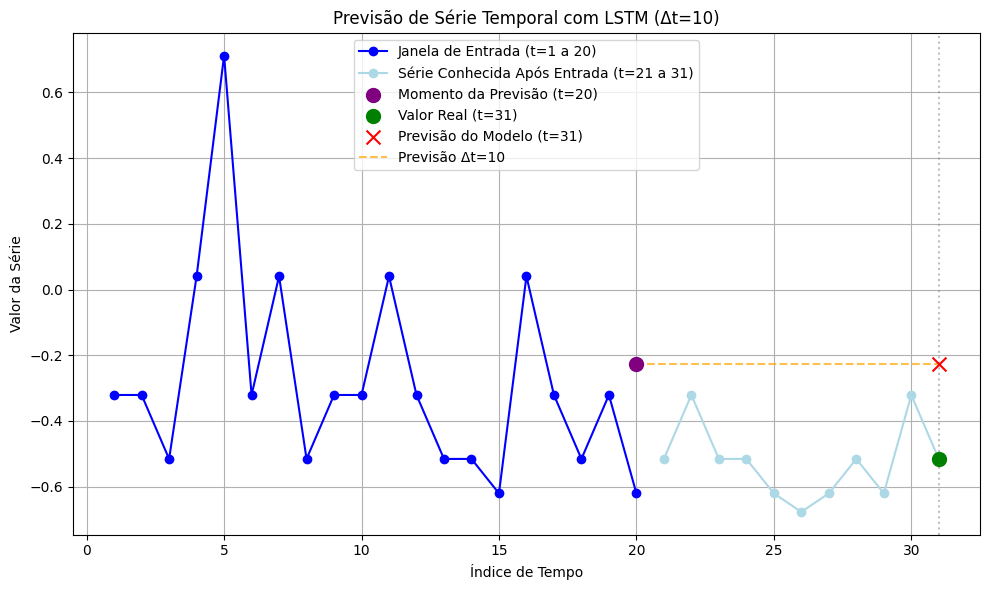

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Índices e parâmetros
start_idx = 1           # Início da janela de entrada (t=1)
end_idx = 21            # Fim da janela de entrada (último ponto observado, t=20)
predict_idx = 31        # Índice do valor a ser previsto (t+10 = 31)
prediction_time = 20    # Tempo em que a previsão foi feita (baseada até t=20)

# Eixo X para janela de entrada
window = np.arange(start_idx, end_idx)  # [1, 2, ..., 20]

# Valores da série já conhecida entre o fim da janela e antes da previsão (t=21 até t=31)
window_known = np.arange(end_idx, predict_idx + 1)  # [21, 22, ..., 31]
series_known = serie_scaled[end_idx:predict_idx + 1]      # Valores reais de t=21 até t=31

# Criar a figura e o gráfico
plt.figure(figsize=(10, 6))

# Plot da janela de entrada (valores usados para prever)
plt.plot(window, input_window, label='Janela de Entrada (t=1 a 20)', marker='o', color='blue')

# Plot da parte conhecida da série após a janela de entrada (t=21 a 31)
plt.plot(window_known, series_known, label='Série Conhecida Após Entrada (t=21 a 31)', marker='o', color='lightblue')

# Marca o momento da previsão (t=20)
plt.scatter(prediction_time, predicted_value, color='purple', s=100,
            label='Momento da Previsão (t=20)', zorder=5)

# Marca o valor real no tempo previsto (t=31)
plt.scatter(predict_idx, true_value, color='green', s=100,
            label='Valor Real (t=31)', zorder=5)

# Marca o valor previsto pelo modelo no tempo previsto (t=31)
plt.scatter(predict_idx, predicted_value, color='red', s=100, marker='x',
            label='Previsão do Modelo (t=31)', zorder=5)

# Linha horizontal ligando o momento da previsão até a previsão para t+10
plt.plot([prediction_time, predict_idx], [predicted_value, predicted_value],
         linestyle='--', color='orange', alpha=0.7, label='Previsão Δt=10')

# Linha vertical pontilhada indicando a posição do valor previsto
plt.axvline(predict_idx, linestyle=':', color='gray', alpha=0.5)

# Configurações finais do gráfico
plt.title("Previsão de Série Temporal com LSTM (Δt=10)")
plt.xlabel("Índice de Tempo")
plt.ylabel("Valor da Série")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Shape X: (102190, 200)
Shape y: (102190,)
Proporção de janelas com pico: 0.030453077600548


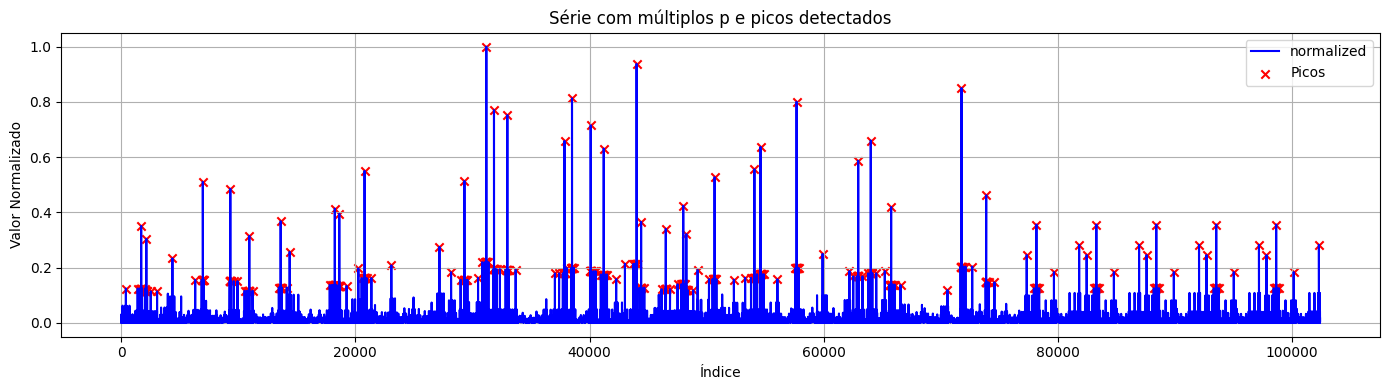

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funções do p-model
def next_step_1d(dx, p):
    y2 = np.zeros(dx.size * 2)
    sign = np.random.rand(dx.size) - 0.5
    sign /= np.abs(sign)
    y2[0::2] = dx + sign * (1 - 2 * p) * dx
    y2[1::2] = dx - sign * (1 - 2 * p) * dx
    return y2

def pmodel(noValues=4096, p=0.35, seed=None):
    if seed is not None:
        np.random.seed(seed)
    noOrders = int(np.ceil(np.log2(noValues)))
    dx = np.array([1.0])
    for _ in range(noOrders):
        dx = next_step_1d(dx, p)
    return dx[:noValues]

# Detecta picos com base em limiar de desvio padrão
def detect_peaks(x, threshold=2):
    mean = np.mean(x)
    std = np.std(x)
    return (x > mean + threshold * std).astype(int)

# Geração de séries concatenadas com múltiplos valores de p
def generate_mixed_p_series(num_series=50, length=1024, p_range=(0.18, 0.42), seed=30):
    np.random.seed(seed)
    all_series = []
    all_ps = []
    for _ in range(num_series):
        p = np.random.uniform(*p_range)
        serie = pmodel(length, p, seed=np.random.randint(0, 10000))
        all_series.append(serie)
        all_ps.append(p)
    return np.concatenate(all_series), all_ps

# Geração de janelas e rótulos binários (pico nos próximos N passos)
def create_supervised_dataset(series, window_size=50, pred_window=10, threshold=2):
    X, y = [], []
    peaks = detect_peaks(series, threshold)
    for i in range(window_size, len(series) - pred_window):
        X.append(series[i - window_size:i])
        y.append(int(np.any(peaks[i:i + pred_window])))
    return np.array(X), np.array(y)

# Geração da base
raw_series, p_values_used = generate_mixed_p_series(num_series=100, length=1024, p_range=(0.18, 0.42))
normalized_series = raw_series / (np.max(np.abs(raw_series)) + 1e-6)

# Criação do dataset supervisionado
X, y = create_supervised_dataset(normalized_series, window_size=200, pred_window=10, threshold=6)

# Visualização rápida
print("Shape X:", X.shape)
print("Shape y:", y.shape)
print("Proporção de janelas com pico:", np.mean(y))

# Exemplo de plot
def plot_series_with_peaks(series, threshold=2, title="Série com Picos", label="normalized"):
    peaks = detect_peaks(series, threshold)
    peak_indices = np.where(peaks == 1)[0]

    plt.figure(figsize=(14, 4))
    plt.plot(series, label=label, color='blue')
    plt.scatter(peak_indices, series[peak_indices], color='red', label='Picos', marker='x')
    plt.title(title)
    plt.xlabel("Índice")
    plt.ylabel("Valor Normalizado")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_series_with_peaks(normalized_series, threshold=6, title='Série com múltiplos p e picos detectados')

Shape X_test: (10030, 200)
Shape y_test: (10030,)
Proporção de picos no teste: 0.03349950149551346


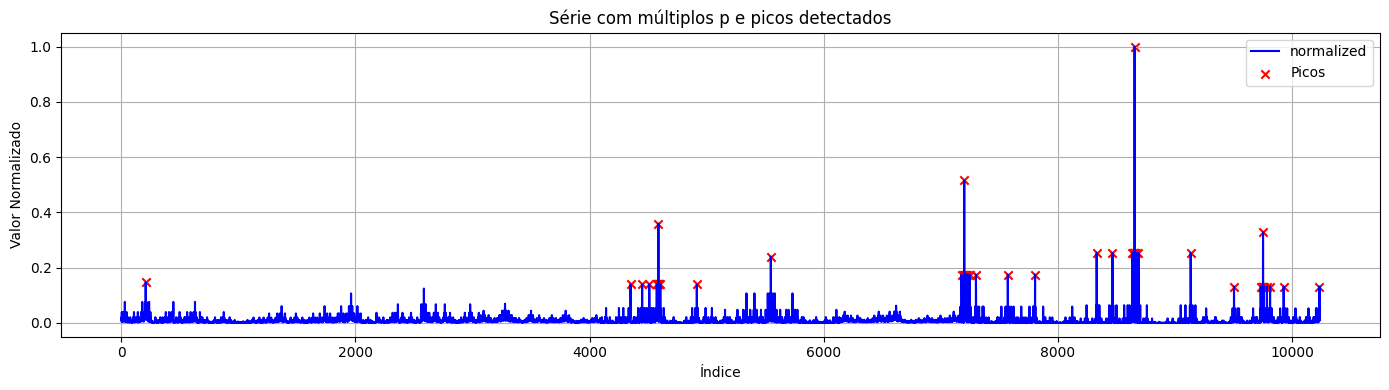

In [78]:
# Gera conjunto de teste
test_series, test_p_values = generate_mixed_p_series(
    num_series=10,         # menos séries que o treino, por exemplo
    length=1024,
    p_range=(0.18, 0.42),
    seed=99                # semente diferente da usada no treino
)

# Normaliza a série
test_normalized = test_series / (np.max(np.abs(test_series)) + 1e-6)

# Cria janelas e rótulos para teste
X_test, y_test = create_supervised_dataset(
    test_normalized,
    window_size=200,
    pred_window=10,
    threshold=6
)

print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)
print("Proporção de picos no teste:", np.mean(y_test))

plot_series_with_peaks(test_normalized, threshold=6, title='Série com múltiplos p e picos detectados')

In [79]:
# ✅ PARÂMETROS (mesmo que antes)
window_size = 200
lookahead = 20
feature_col = "dfn_scaled"
label_col = "peak"

In [80]:
def create_sequences_with_anticipation(signal, labels, window_size, lookahead):
    X, y = [], []
    for i in range(len(signal) - window_size - lookahead):
        X.append(signal[i : i + window_size])
        y.append(int(np.any(labels[i + window_size : i + window_size + lookahead])))
    return np.array(X)[..., np.newaxis], np.array(y)

# Prepare os sinais e picos para treino/teste
signal_train = normalized_series
labels_train = detect_peaks(normalized_series, threshold=2)

signal_test = test_normalized
labels_test = detect_peaks(test_normalized, threshold=2)

X_train, y_train = create_sequences_with_anticipation(signal_train, labels_train, window_size, lookahead)
X_test, y_test = create_sequences_with_anticipation(signal_test, labels_test, window_size, lookahead)


In [81]:
from sklearn.utils import class_weight
import numpy as np

# Garante que y_train é um array plano
y_train_flat = y_train.flatten()  # útil caso y_train esteja em shape (N,1)

# Calcula os pesos balanceados para as classes
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_flat), y=y_train_flat)
class_weights = {i: w for i, w in enumerate(weights)}

print("Class weights:", class_weights)

Class weights: {0: np.float64(0.6355189013695562), 1: np.float64(2.344761117995319)}


In [82]:
from keras.layers import Activation
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.keras import backend as K
from sklearn.utils import class_weight

In [83]:
def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma) * y_true + (1 - alpha) * K.pow(y_pred, gamma) * (1 - y_true)
        loss = weight * cross_entropy
        return K.mean(loss)
    return focal_loss_fixed

# Class weights
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: w for i, w in enumerate(weights)}

# Modelo LSTM conforme descrito
model = Sequential([
    Input(shape=(window_size, 1)),

    LSTM(64, return_sequences=True),
    Activation('silu'),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True),
    Activation('silu'),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    Activation('silu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

# Compilação
model.compile(
    optimizer=AdamW(),
    loss=focal_loss(gamma=2., alpha=.25),
    metrics=['accuracy']
)

model.summary()

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', mode='max', patience=15, min_delta=1e-4, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
]

# Treinamento
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 200, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 200, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 200, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,777 (327.25 KB)

 Trainable params: 83,393 (325.75 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.7835 - loss: 0.0607

1278/1278 ━━━━━━━━━━━━━━━━━━━━ 665s 514ms/step - accuracy: 0.7836 - loss: 0.0607 - val_accuracy: 0.7832 - val_loss: 0.1606
Epoch 2/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.8047 - loss: 0.0464

1278/1278 ━━━━━━━━━━━━━━━━━━━━ 718s 543ms/step - accuracy: 0.8047 - loss: 0.0464 - val_accuracy: 0.7890 - val_loss: 0.0499
Epoch 3/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 693s 542ms/step - accuracy: 0.8098 - loss: 0.0417 - val_accuracy: 0.7838 - val_loss: 0.0996
Epoch 4/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 696s 544ms/step - accuracy: 0.8138 - loss: 0.0391 - val_accuracy: 0.7097 - val_loss: 0.0945
Epoch 5/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.8082 - loss: 0.0394

1278/1278 ━━━━━━━━━━━━━━━━━━━━ 743s 545ms/step - accuracy: 0.8082 - loss: 0.0394 - val_accuracy: 0.8150 - val_loss: 0.0413
Epoch 6/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 742s 546ms/step - accuracy: 0.8128 - loss: 0.0379 - val_accuracy: 0.8052 - val_loss: 0.0434
Epoch 7/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 705s 517ms/step - accuracy: 0.8171 - loss: 0.0374 - val_accuracy: 0.7971 - val_loss: 0.0435
Epoch 8/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 679s 515ms/step - accuracy: 0.8196 - loss: 0.0364 - val_accuracy: 0.8021 - val_loss: 0.0382
Epoch 9/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 720s 544ms/step - accuracy: 0.8210 - loss: 0.0361 - val_accuracy: 0.7906 - val_loss: 0.0414
Epoch 10/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 740s 543ms/step - accuracy: 0.8208 - loss: 0.0359 - val_accuracy: 0.8050 - val_loss: 0.0404
Epoch 11/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 660s 516ms/step - accuracy: 0.8251 - loss: 0.0355 - val_accuracy: 0.8037 - val_loss: 0.0396
Epoch 12/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 698s 547ms/step - accuracy: 

1278/1278 ━━━━━━━━━━━━━━━━━━━━ 747s 547ms/step - accuracy: 0.8428 - loss: 0.0329 - val_accuracy: 0.8335 - val_loss: 0.0360
Epoch 16/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 695s 544ms/step - accuracy: 0.8451 - loss: 0.0323 - val_accuracy: 0.8302 - val_loss: 0.0334
Epoch 17/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 738s 541ms/step - accuracy: 0.8500 - loss: 0.0318 - val_accuracy: 0.8127 - val_loss: 0.0372
Epoch 18/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.8500 - loss: 0.0317

1278/1278 ━━━━━━━━━━━━━━━━━━━━ 706s 513ms/step - accuracy: 0.8500 - loss: 0.0317 - val_accuracy: 0.8431 - val_loss: 0.0328
Epoch 19/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 714s 539ms/step - accuracy: 0.8537 - loss: 0.0308 - val_accuracy: 0.8278 - val_loss: 0.0391
Epoch 20/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 746s 542ms/step - accuracy: 0.8539 - loss: 0.0308 - val_accuracy: 0.8151 - val_loss: 0.0387
Epoch 21/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.8575 - loss: 0.0296

1278/1278 ━━━━━━━━━━━━━━━━━━━━ 690s 540ms/step - accuracy: 0.8575 - loss: 0.0296 - val_accuracy: 0.8618 - val_loss: 0.0338
Epoch 22/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 744s 541ms/step - accuracy: 0.8646 - loss: 0.0287 - val_accuracy: 0.8155 - val_loss: 0.0524
Epoch 23/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.8677 - loss: 0.0281

1278/1278 ━━━━━━━━━━━━━━━━━━━━ 689s 539ms/step - accuracy: 0.8677 - loss: 0.0281 - val_accuracy: 0.8794 - val_loss: 0.0266
Epoch 24/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 743s 540ms/step - accuracy: 0.8709 - loss: 0.0275 - val_accuracy: 0.8702 - val_loss: 0.0257
Epoch 25/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 742s 540ms/step - accuracy: 0.8722 - loss: 0.0271 - val_accuracy: 0.8705 - val_loss: 0.0359
Epoch 26/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.8787 - loss: 0.0259

1278/1278 ━━━━━━━━━━━━━━━━━━━━ 652s 511ms/step - accuracy: 0.8787 - loss: 0.0259 - val_accuracy: 0.8853 - val_loss: 0.0268
Epoch 27/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 684s 512ms/step - accuracy: 0.8817 - loss: 0.0258 - val_accuracy: 0.8371 - val_loss: 0.0480
Epoch 28/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.8829 - loss: 0.0252

1278/1278 ━━━━━━━━━━━━━━━━━━━━ 717s 539ms/step - accuracy: 0.8829 - loss: 0.0252 - val_accuracy: 0.8884 - val_loss: 0.0289
Epoch 29/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 743s 541ms/step - accuracy: 0.8860 - loss: 0.0243 - val_accuracy: 0.8103 - val_loss: 0.0504
Epoch 30/30
1278/1278 ━━━━━━━━━━━━━━━━━━━━ 690s 540ms/step - accuracy: 0.8902 - loss: 0.0235 - val_accuracy: 0.8863 - val_loss: 0.0251


In [84]:
def plot_predictions(data, predictions, n_steps, shift_n=0, show_peaks=True, start=None, end=None):
    import matplotlib.pyplot as plt
    import numpy as np

    # Copiar dados e adicionar coluna de previsões
    full_data = data.copy()
    full_data['Predicted_Probabilities'] = np.nan
    full_data.loc[n_steps:n_steps + len(predictions) - 1, 'Predicted_Probabilities'] = predictions

    # Criar versão deslocada, se necessário
    if shift_n > 0:
        full_data['Shifted_Probabilities'] = full_data['Predicted_Probabilities'].shift(-shift_n)

    # Aplicar recorte se necessário
    if start is not None and end is not None:
        full_data = full_data.iloc[start:end]

    # Iniciar plotagem
    plt.figure(figsize=(14, 6))

    # Sinal original
    plt.plot(full_data.index, full_data['normalized'], label='Normalized Values (SDO)',
             color='blue', alpha=0.7, linewidth=1.5)

    # Picos detectados
    if 'peak' in full_data.columns and show_peaks:
        plt.scatter(full_data.index[full_data['peak'] == 1],
                    full_data['normalized'][full_data['peak'] == 1],
                    color='red', label='Detected Peaks', zorder=5, s=50, edgecolor='black')

    # Previsões deslocadas OU originais
    if shift_n > 0:
        plt.plot(full_data.index, full_data['Shifted_Probabilities'],
                 label=f'Shifted Predicted Probabilities (Shift={shift_n})',
                 color='orange', alpha=0.8, linestyle='-.', linewidth=2)
    else:
        plt.plot(full_data.index, full_data['Predicted_Probabilities'],
                 label='Predicted Probabilities (LSTM)',
                 color='green', alpha=0.8, linestyle='--', linewidth=2)

    # Configurações finais
    plt.title('Peak Detection and Anomaly Predictions Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Time-like', fontsize=12)
    plt.ylabel('Normalized Values / Probability', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [85]:
ini = 6000
end = 8000

In [86]:
signal_df = pd.DataFrame({
    'normalized': signal_test
})


In [87]:
# ✅ OBTER PREVISÕES E VISUALIZAR
predictions = model.predict(X_test).flatten()



314/314 ━━━━━━━━━━━━━━━━━━━━ 33s 103ms/step


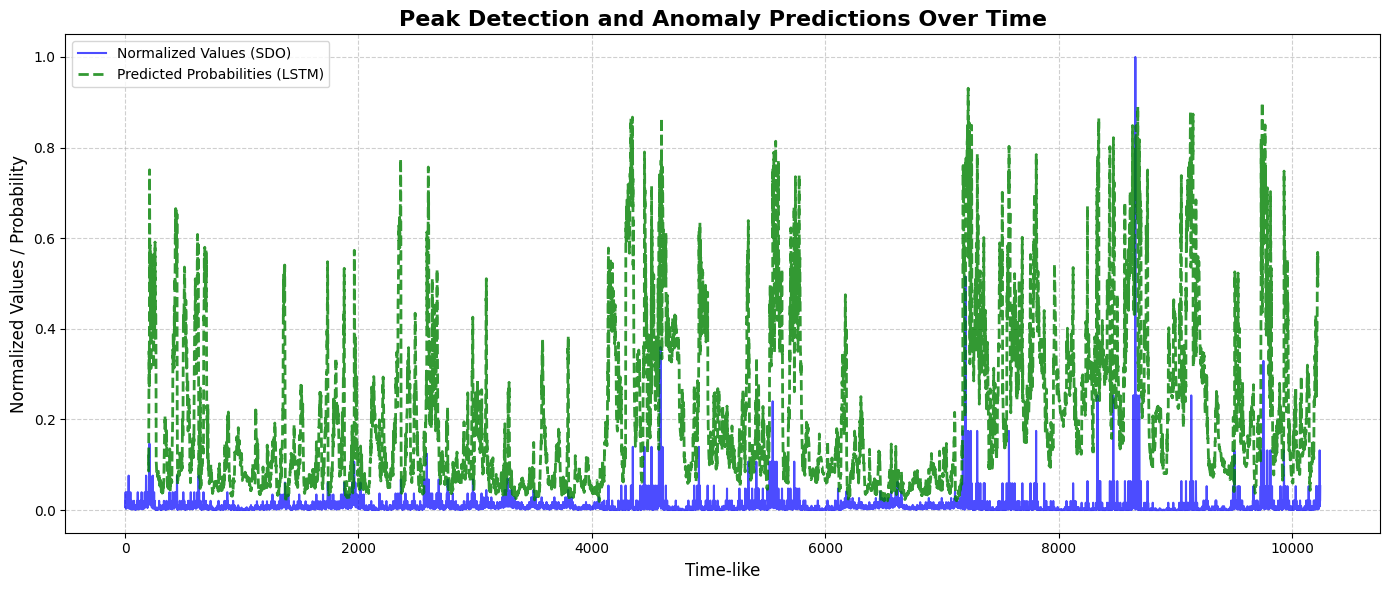

In [88]:
plot_predictions(signal_df, predictions, n_steps=window_size, show_peaks=True)

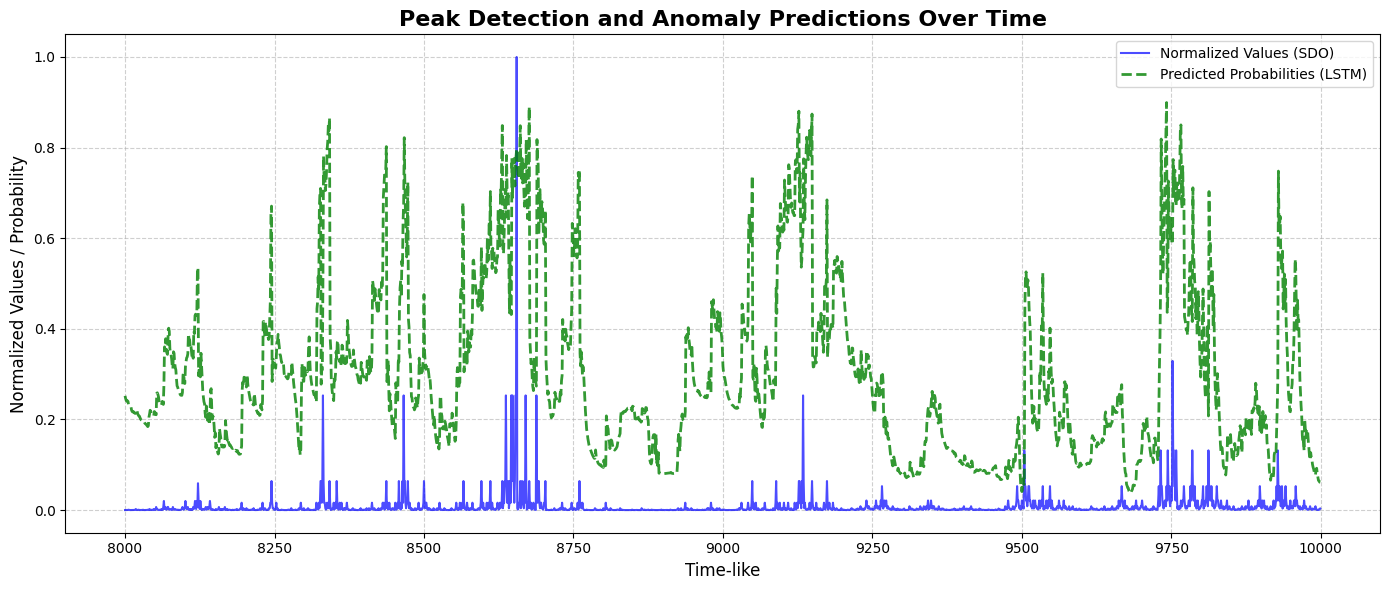

In [89]:
plot_predictions(signal_df, predictions, n_steps=window_size, show_peaks=True, start=8000, end=10000)

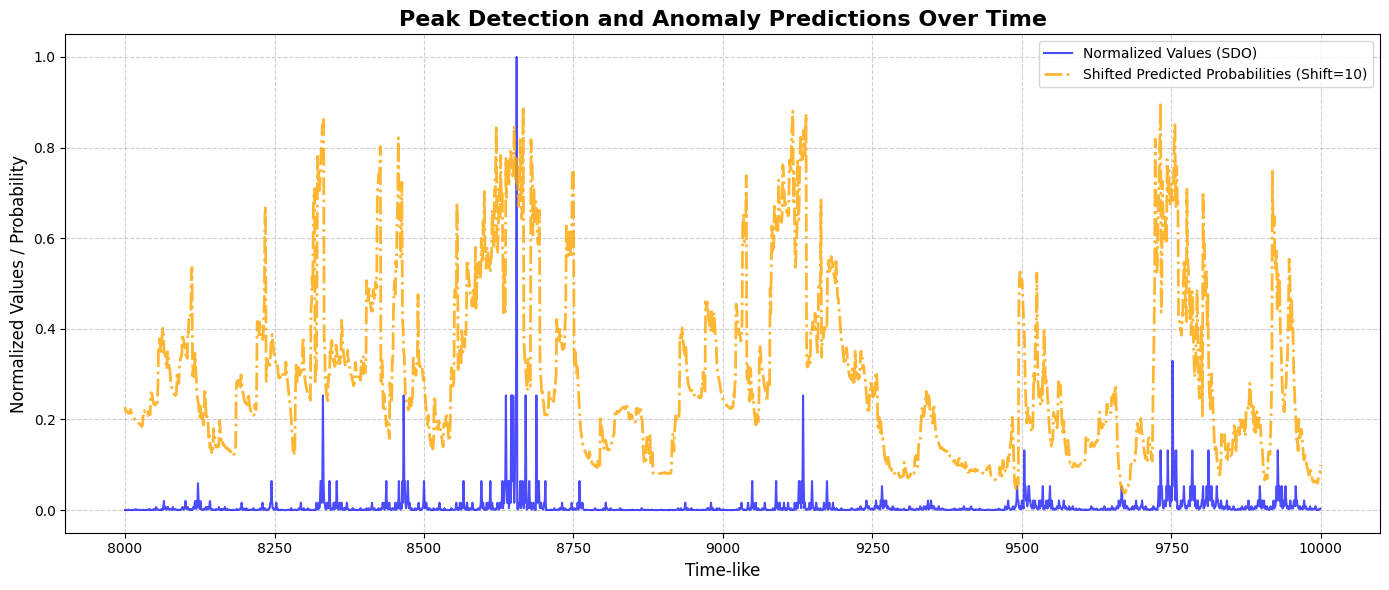

In [90]:
plot_predictions(signal_df, predictions, n_steps=window_size, show_peaks=True, start=8000, end=10000, shift_n=10)

In [45]:
import pandas as pd

# Carregar o CSV
df = pd.read_csv('/content/sdo-A10A-29nv20.csv')

# Garantir que a coluna Amplitude está presente
assert 'Amplitude' in df.columns, "Coluna 'Amplitude' não encontrada no arquivo!"

# Usar apenas a coluna de interesse
amplitude_series = df['Amplitude'].values
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
amplitude_normalized = scaler.fit_transform(amplitude_series.reshape(-1, 1)).flatten()
X_test, y_test = create_sequences_with_anticipation(amplitude_normalized, labels_test, window_size, lookahead)
predictions = model.predict(X_test).flatten()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


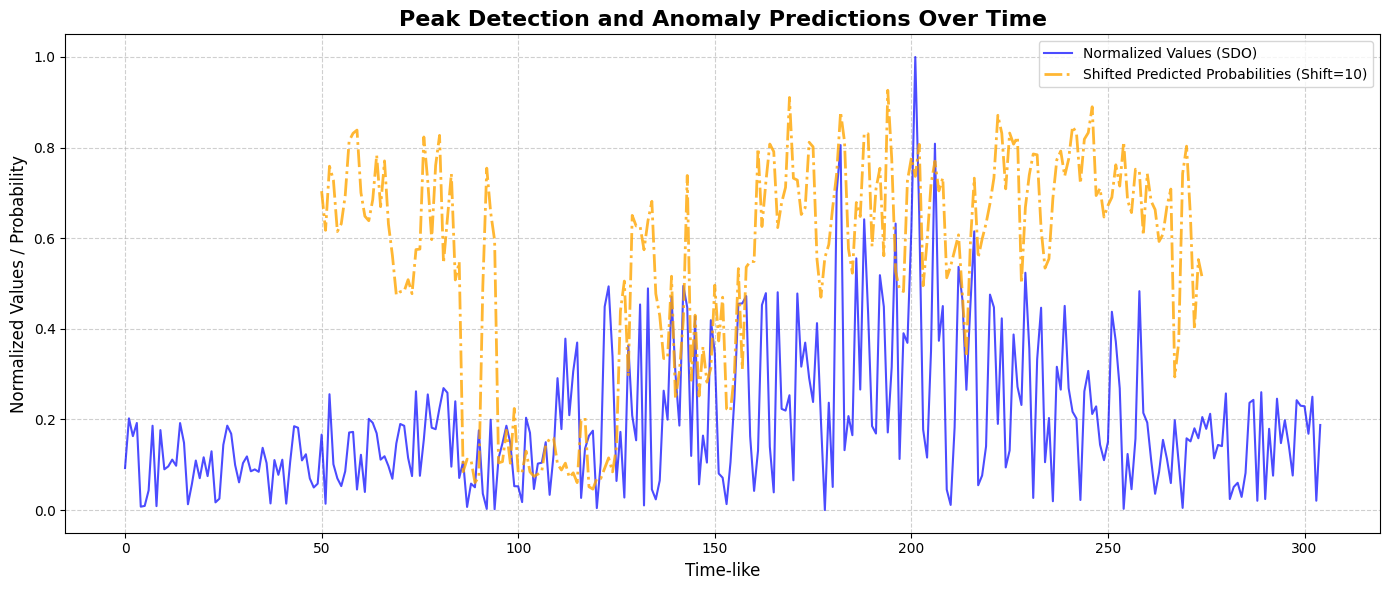

In [23]:
# Montar DataFrame de sinal normalizado
signal_df = pd.DataFrame({'normalized': amplitude_normalized})

# Plotar (com ou sem shift)
plot_predictions(signal_df, predictions, n_steps=window_size, show_peaks=True, shift_n=10)


In [58]:
import pandas as pd

# Carregar o CSV
df = pd.read_csv('/content/ae_index_normalizado.csv')

# Garantir que a coluna Amplitude está presente
assert 'norm' in df.columns, "Coluna 'norm' não encontrada no arquivo!"

# Usar apenas a coluna de interesse
amplitude_series = df['norm'].values
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
amplitude_normalized = scaler.fit_transform(amplitude_series.reshape(-1, 1)).flatten()
X_test, y_test = create_sequences_with_anticipation(amplitude_normalized, labels_test, window_size, lookahead)
predictions = model.predict(X_test).flatten()


1393/1393 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step


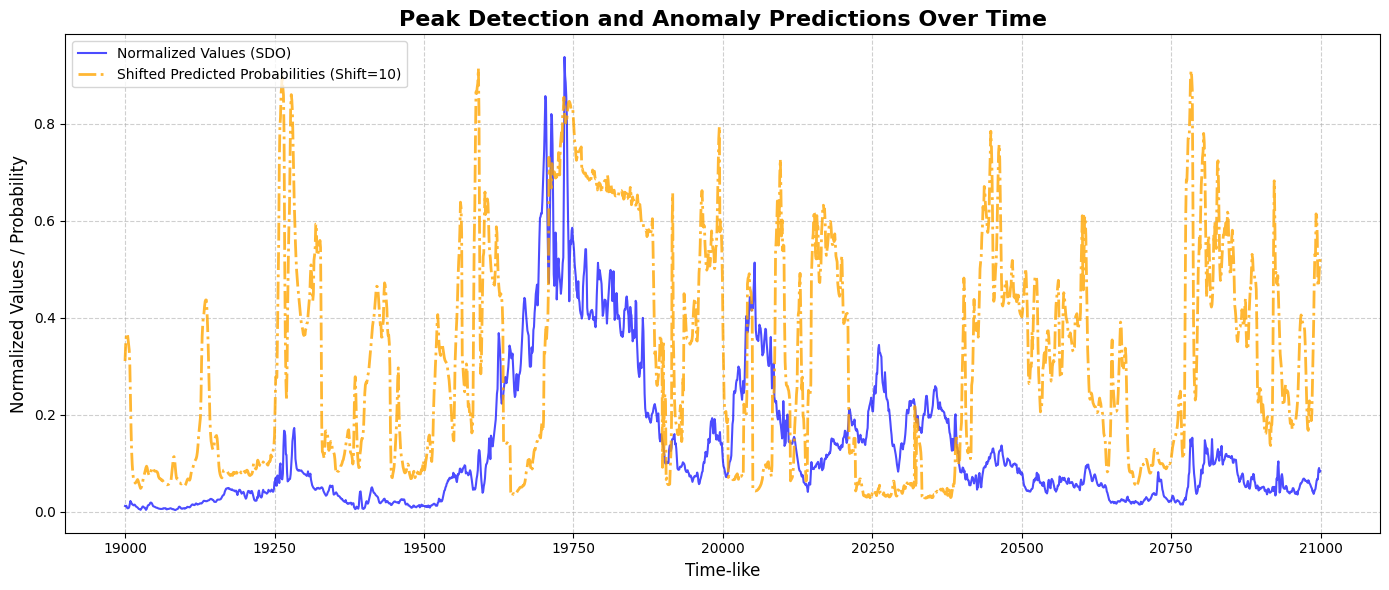

In [74]:
# Montar DataFrame de sinal normalizado
signal_df = pd.DataFrame({'normalized': amplitude_normalized})

# Plotar (com ou sem shift)
plot_predictions(signal_df, predictions, n_steps=window_size, show_peaks=True, shift_n=10, start=19000, end=21000)


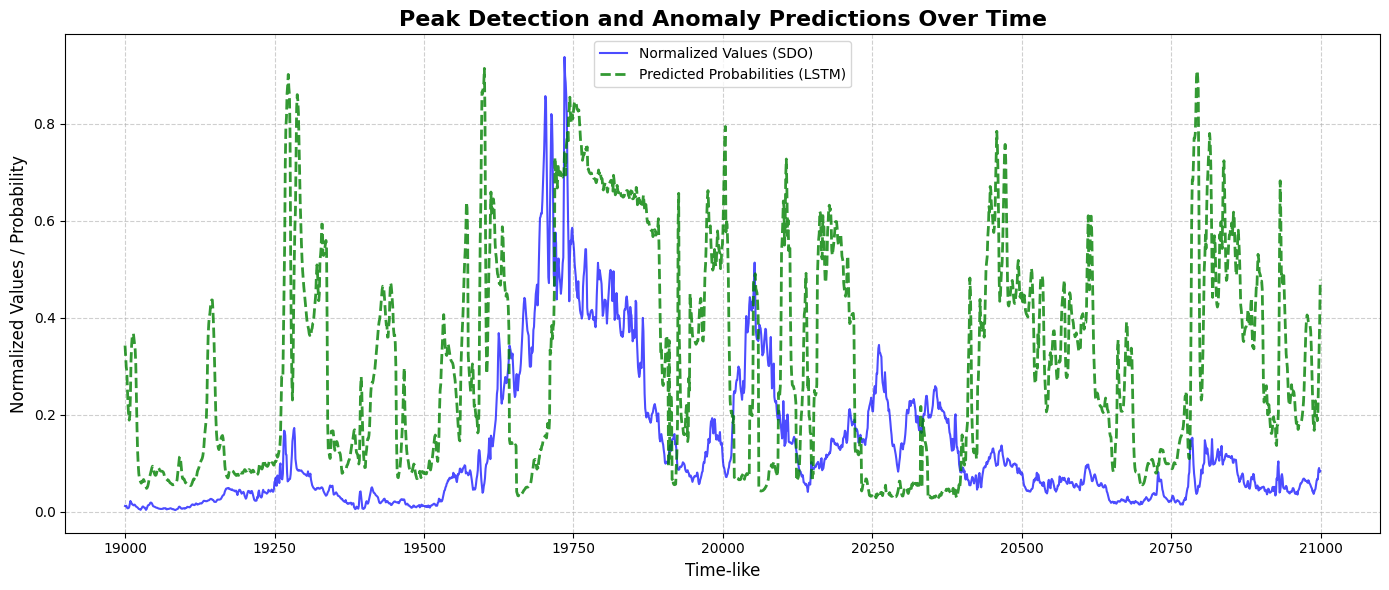

In [75]:
plot_predictions(signal_df, predictions, n_steps=window_size, show_peaks=True, start=19000, end=21000)